# Color Masking, Green Screen

### Import resources

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np
import cv2

%matplotlib inline

### Read in and display the image

Image dimensions: (450, 660, 3)


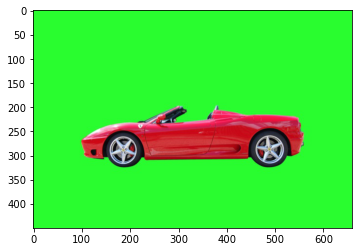

In [2]:
# Read in the image
image = mpimg.imread('images/car_green_screen.jpg')

# Print out the image dimensions (height, width, and depth (color))
print('Image dimensions:', image.shape)

# Display the image
plt.imshow(image)

### Define the color threshold

In [3]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])


### Create a mask

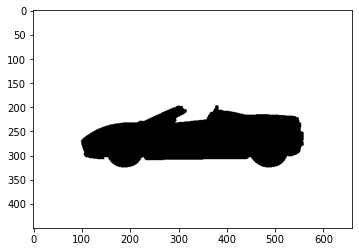

In [4]:
# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Vizualize the mask
plt.imshow(mask, cmap='gray')

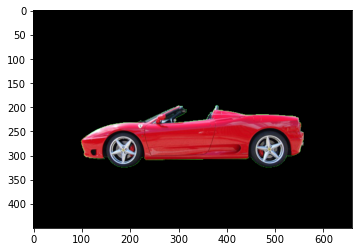

In [5]:
# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]

# Display it!
plt.imshow(masked_image)


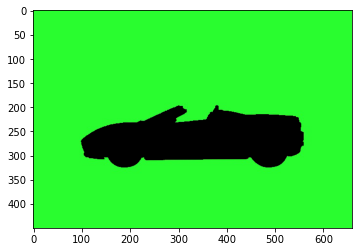

In [6]:
opp_image = np.copy(image)
opp_image[mask==0] = [0, 0, 0]
plt.imshow(opp_image)

## TODO: Mask and add a background image

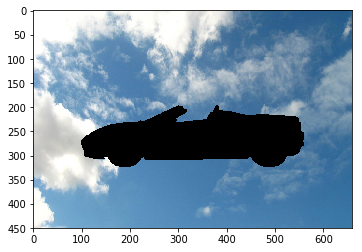

In [21]:
# Load in a background image, and convert it to RGB 
background_image = mpimg.imread('images/sky.jpg')
# plt.imshow(background_image)

## TODO: Crop it or resize the background to be the right size (450x660)
# Hint: Make sure the dimensions are in the correct order!

background_image_resized = cv2.resize(background_image, (660, 450))

## TODO: Mask the cropped background so that the car area is blocked
# Hint: mask the opposite area of the previous image

background_image_resized[mask == 0] = [0,0,0]

## TODO: Display the background and make sure 

plt.imshow(background_image_resized)


### TODO:  Create a complete image

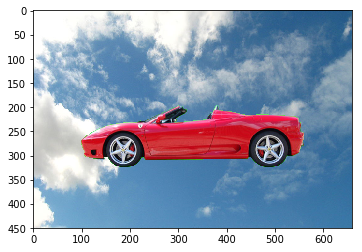

In [22]:
## TODO: Add the two images together to create a complete image!
# complete_image = masked_image + crop_background

complete_image = masked_image + background_image_resized
plt.imshow(complete_image)